[ 4.147456  7.985725 11.990797 16.080181 20.150437 24.297952]


[0, 32000, 0, 25]

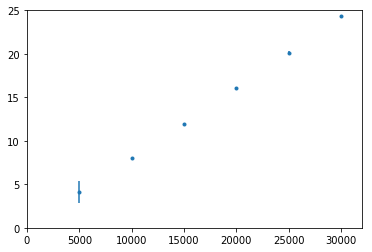

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit

R=np.array([5000,10000,15000,20000,25000,30000])
U_aus=np.array([2.45,3.137,3.721,4.235,4.691,5.114])
fehler_U_aus=np.array([0.26,0.011,0.015,0.018,0.018,0.017])
U_V=1.362
Fehler_U_V=0.005
D=U_aus**2-U_V**2
fehler_D=np.sqrt((2*U_aus*fehler_U_aus)**2-(U_V*2*Fehler_U_V)**2)
print(D)
plt.errorbar(R,D,yerr=fehler_D, fmt='.',)
plt.axis([0,32000,0,25])

c: 0.0008064877318673681
k: 1.412076513943033e-23
dkstat 6.78980846399732e-32
dksys 2.8241530278860663e-25


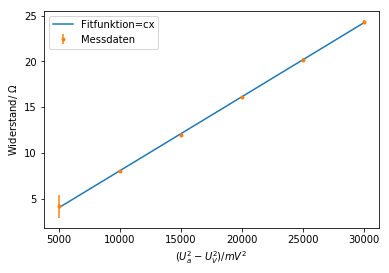

In [22]:
def linear(x,c):
    return(c*x)
popt, pcov = curve_fit(linear,R,D)
plt.plot (R,linear(R,popt[0]),label='Fitfunktion=cx')
plt.errorbar(R,D,yerr=fehler_D, fmt='.',label='Messdaten')
plt.xlabel('$(U_a^2-U_V^2) / mV^2 $')
plt.ylabel('Widerstand/ $\Omega$')
plt.legend(loc='best')
print("c:",popt[0])
print("k:",popt[0]/4/4.85e10/294.4/1e6)
print("dkstat", pcov[0][0]/4/4.85e10/294.4/1e6)
print("dksys", popt[0]/4/4.85e10**2/294.4/1e6*np.sqrt((0.02*4.85e10)**2+0.1**2/294.4**2))

In [3]:
chisquare=np.sum(((linear(R,*popt)-D)**2/fehler_D**2))
dof=5 #Freiheitsgrade
chisquare_red=chisquare/dof
print('Chi^2='+str(chisquare))
print('Chi^2_R='+str(chisquare_red))
from scipy.stats import chi2 
prob=round(1-chi2.cdf(chisquare,dof),2)*100
print("Wahrscheinlichkeit="+str(prob)+"%")#
print(popt[0])
print(np.sqrt(pcov[0,0]))

Chi^2=2.7678585767264856
Chi^2_R=0.5535717153452971
Wahrscheinlichkeit=74.0%
0.0008064877318673681
1.9692394590027827e-06
